# **Como a propagação de epidemias é influenciada pela topologia da rede?**

Por **Gustavo Andrade Tavares**

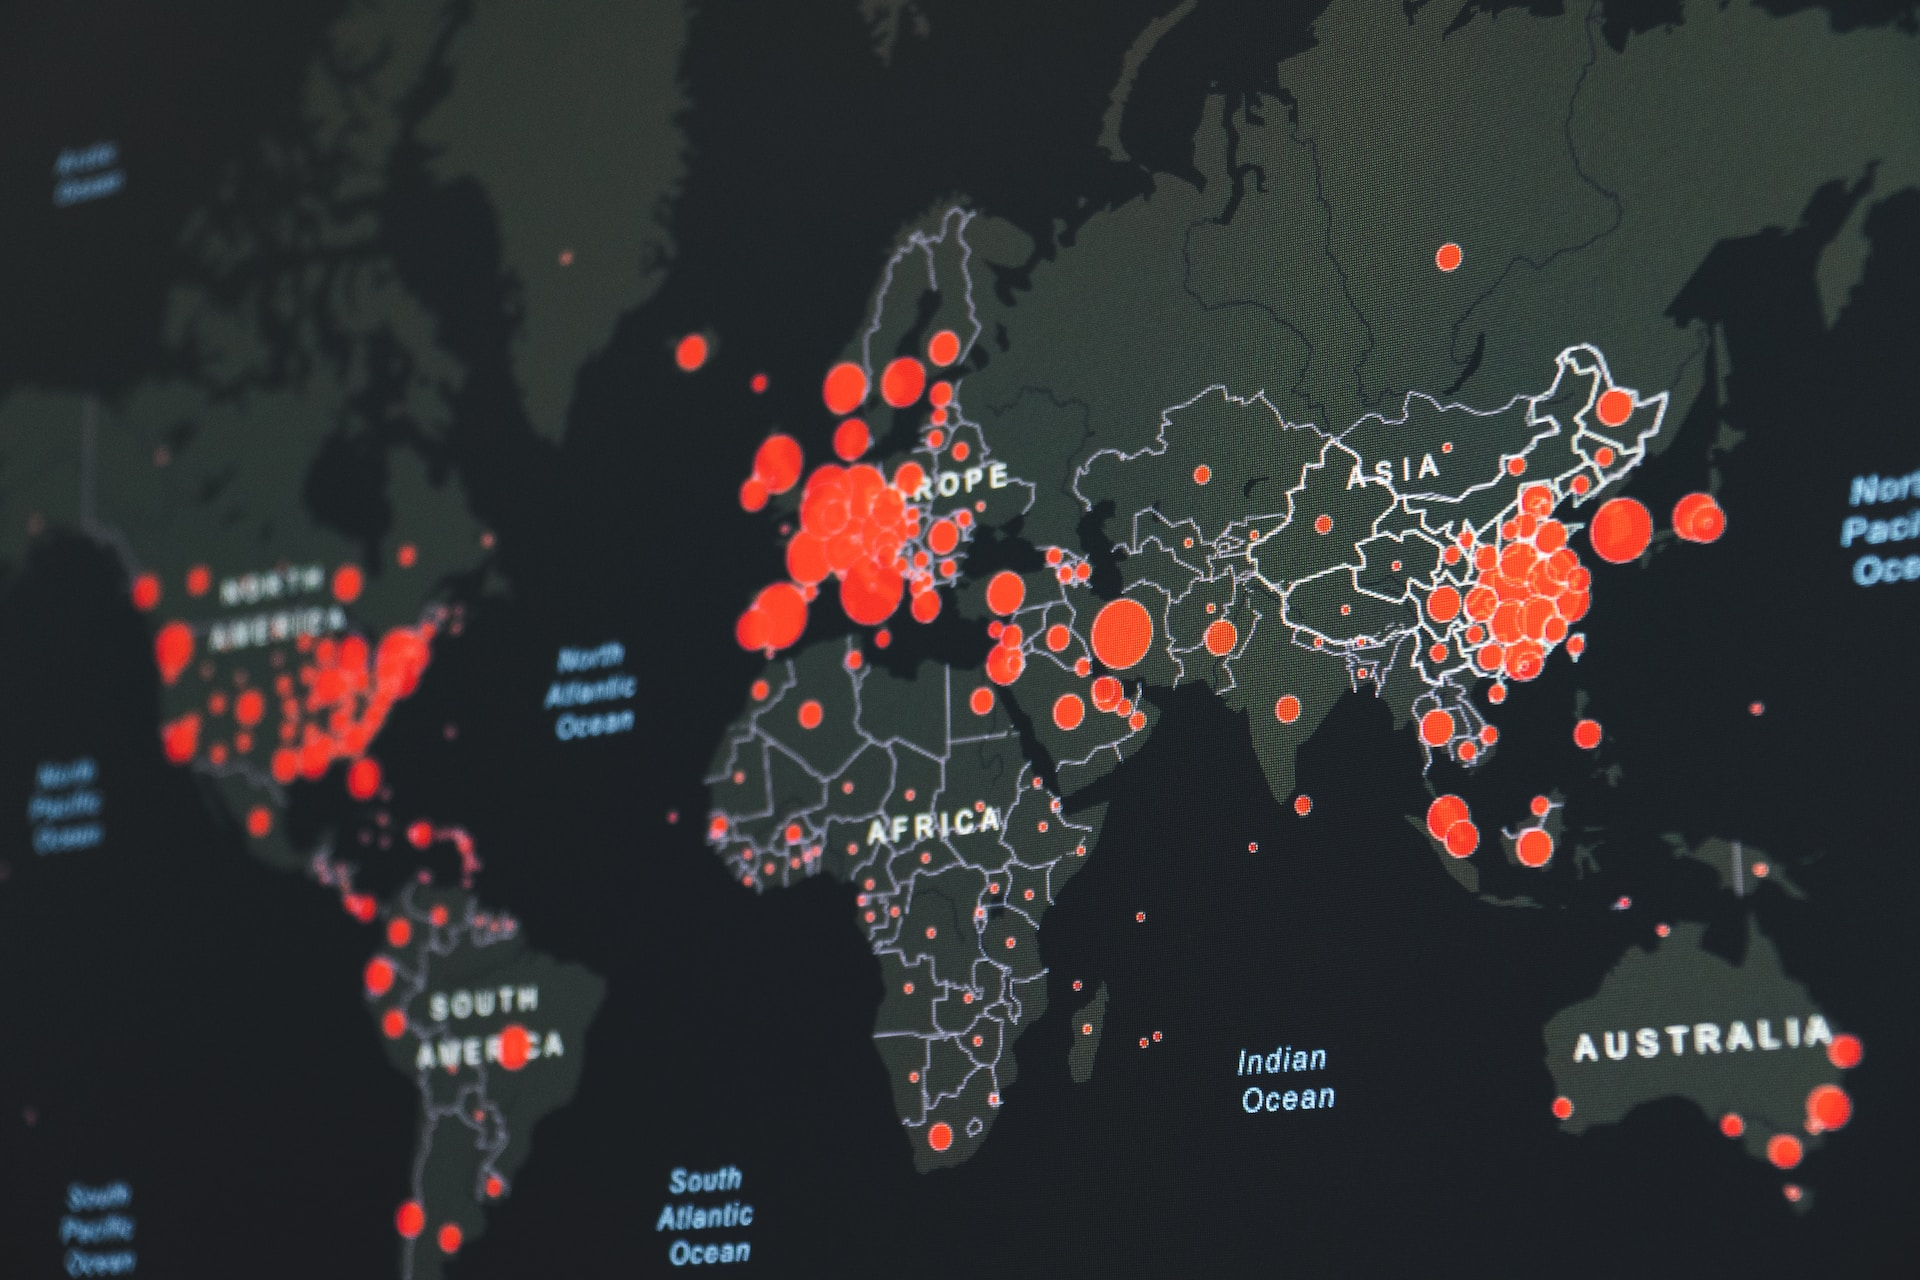

Foto de <a href="https://unsplash.com/pt-br/@martinsanchez?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Martin Sanchez</a> na <a href="https://unsplash.com/pt-br/fotografias/j2c7yf223Mk?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## **1) Introdução**

A propagação de epidemias em redes complexas tem sido amplamente estudada para compreender como a estrutura das interações entre os indivíduos influencia a disseminação de doenças. A topologia da rede, que descreve a forma como os nós e as conexões estão organizados, desempenha um papel crucial nesse processo. Neste projeto, estudaremos a propagação de doenças baseadas em contatos em redes complexas.

Para implementar os modelos de propagação de epidemias, faremos uso da biblioteca EoN (Epidemics on Networks). Essa biblioteca oferece uma série de funcionalidades que nos permitirão analisar diferentes tipos de redes, como Erdos-Renyi e Rede de Aeroportos da base de dados "USairport500". Esses modelos nos permitirão analisar diferentes características de redes, como a aleatoriedade das conexões, a presença de hubs e a propensão à formação de grupos.

Neste projeto o foco será em dois modelos específicos: o modelo SIR (Susceptible-Infectious-Recovered) e o modelo SIS (Susceptible-Infectious-Susceptible). No modelo SIR, consideraremos a taxa de recuperação (mu) igual a 1, enquanto variaremos a taxa de propagação (beta). Já no modelo SIS, calcularemos a fração de infectados em função de beta.

Para o modelo SIS, analisaremos as relações
- Suscetíveis e infectados ao longo do tempo
- Fração de infectados em função da taxa de propagação

Além disso, investigaremos o efeito da vacinação no modelo SIR, no qual consideraremos que vacinados não vão pegar a doença novamente. Analisaremos a porcentagem de vacinados em relação à diferentes medidas, a fim de compreender como a escolha dos indivíduos vacinados influencia a propagação da doença. Para o modelo SIR, analisaremos as seguintes relações
- Fração de recuperados em função da taxa de propagação
- Suscetíveis, infectados e recuperados ao longo do tempo
- Heatmap da porcentagem de recuperados contra o tempo
- Impacto da vacinação aleatória
- Impacto da vacinação de acordo com Hubs
- Impacto da vacinação de acordo com medida de centralidade (centralidade do grau)

Em suma, este projeto busca entender a propagação de epidemias em redes complexas, utilizando modelos de propagação de doenças e considerando diferentes topologias de rede. Além disso, investigaremos o impacto da vacinação na propagação da doença, analisando diferentes estratégias de vacinação. Essas análises nos ajudarão a obter insights valiosos sobre o controle de epidemias e a importância da estrutura das redes na disseminação de doenças.

## **2) Bibliotecas**

In [1]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120791 sha256=816360e4358cdf432c108a794fd11a5b20a2cd924ba2efdbd937159e280a6dec
  Stored in directory: /root/.cache/pip/wheels/cc/38/06/01956d0db50e69cbcd6752d4b362685690c4fc17a80674bf18
Successfully built EoN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import EoN
import random as random
import seaborn as sns
import pandas as pd

## **3) Análises do modelo SIR e SIS**

### **3.1) Erdos-Renyi**

#### Gerando a rede e criando o grafo da epidemia

Inicialmente, geramos quatro redes do modelo Erdos-Renyi com $N = 1000$ nós, considerando as seguintes probabilidades de criação de arestas: $p_1 = 0$,  $p_2 = 0.05$,  $p_3 = 0.1$  e  $p_4 = 0.3$.

In [ ]:
# Geração da rede Erdos-Renyi
N = 1000

p1 = 0 # Probabilidade de criação de arestas
GER1 = nx.gnp_random_graph(N, p1, seed=100, directed=False)

p2 = 0.05 # Probabilidade de criação de arestas
GER2 = nx.gnp_random_graph(N, p2, seed=100, directed=False)

p3 = 0.1 # Probabilidade de criação de arestas
GER3 = nx.gnp_random_graph(N, p3, seed=100, directed=False)

p4 = 0.3 # Probabilidade de criação de arestas
GER4 = nx.gnp_random_graph(N, p4, seed=100, directed=False)

Visualizando as redes geradas, temos:

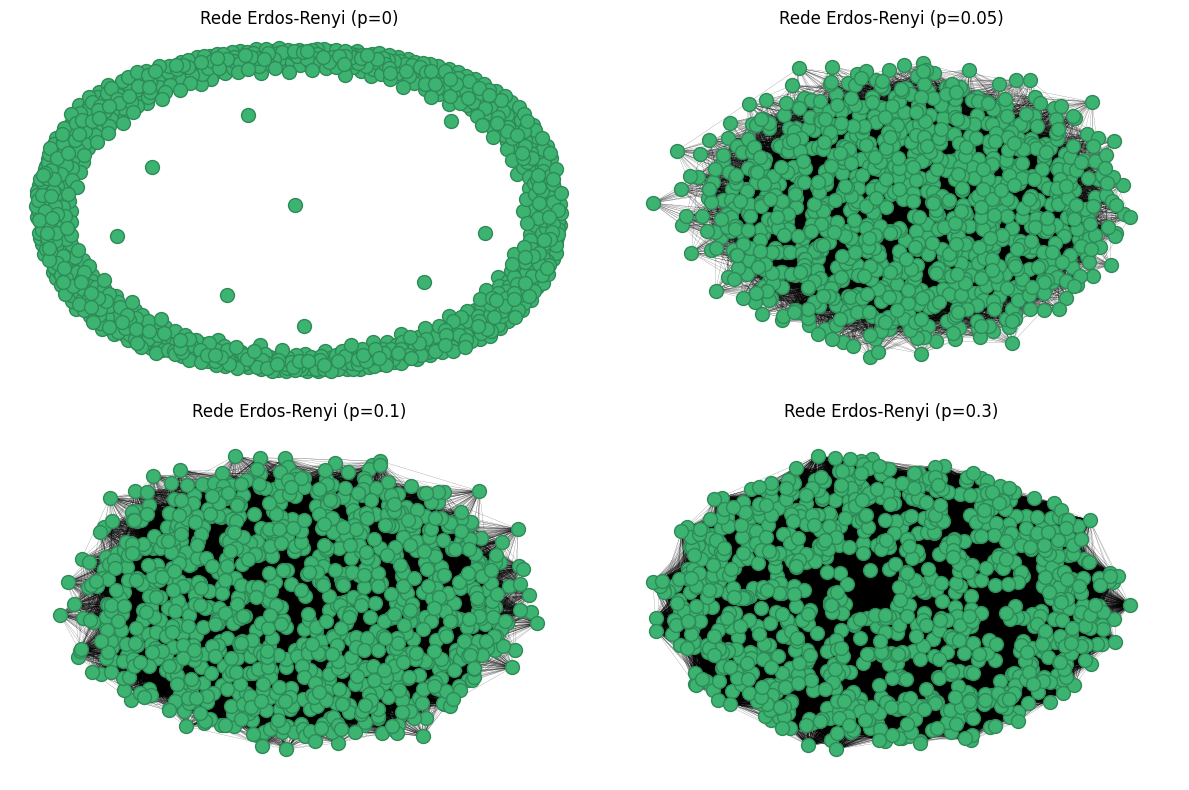

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
pos1 = nx.spring_layout(GER1)
nx.draw(GER1, pos1, node_color="#3CB371", node_size=100, with_labels=False, edgecolors='#2E8B57', width=0.1, ax=ax1)
ax1.set_title("Rede Erdos-Renyi (p=0)")

# Plot do segundo gráfico
ax2 = axes[0,1]
pos2 = nx.spring_layout(GER2)
nx.draw(GER2, pos2, node_color="#3CB371", node_size=100, with_labels=False, edgecolors='#2E8B57', width=0.1, ax=ax2)
ax2.set_title("Rede Erdos-Renyi (p=0.05)")

# Plot do terceiro gráfico
ax3 = axes[1,0]
pos3 = nx.spring_layout(GER3)
nx.draw(GER3, pos3, node_color="#3CB371", node_size=100, with_labels=False, edgecolors='#2E8B57', width=0.1, ax=ax3)
ax3.set_title("Rede Erdos-Renyi (p=0.1)")

# Plot do quarto gráfico
ax4 = axes[1,1]
pos4 = nx.spring_layout(GER4)
nx.draw(GER4, pos4, node_color="#3CB371", node_size=100, with_labels=False, edgecolors='#2E8B57', width=0.1, ax=ax4)
ax4.set_title("Rede Erdos-Renyi (p=0.3)")

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

#### Suscetíveis, infectados e recuperados no modelo SIR

Para simular a epidemia por meio do modelo SIR, utilizamos a função `fast_SIR` da biblioteca EoN. Assim, para iniciar a simulação, é feita a escolha aleatória de 10 infectados iniciais para cada rede gerada.

In [ ]:
# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Definindo o estado inicial dos nós
initial_infections1 = list(np.random.choice(list(GER1.nodes()), 10, replace=False))
initial_infections2 = list(np.random.choice(list(GER2.nodes()), 10, replace=False))
initial_infections3 = list(np.random.choice(list(GER3.nodes()), 10, replace=False))
initial_infections4 = list(np.random.choice(list(GER4.nodes()), 10, replace=False))

# Simulando a propagação da epidemia+
t1, S1, I1, R1 = EoN.fast_SIR(GER1, tau, gamma, initial_infecteds=initial_infections1)
t2, S2, I2, R2 = EoN.fast_SIR(GER2, tau, gamma, initial_infecteds=initial_infections2)
t3, S3, I3, R3 = EoN.fast_SIR(GER3, tau, gamma, initial_infecteds=initial_infections3)
t4, S4, I4, R4 = EoN.fast_SIR(GER4, tau, gamma, initial_infecteds=initial_infections4)

Os gráficos das simulações da epidemia para as quatro redes são sumarizados a seguir:

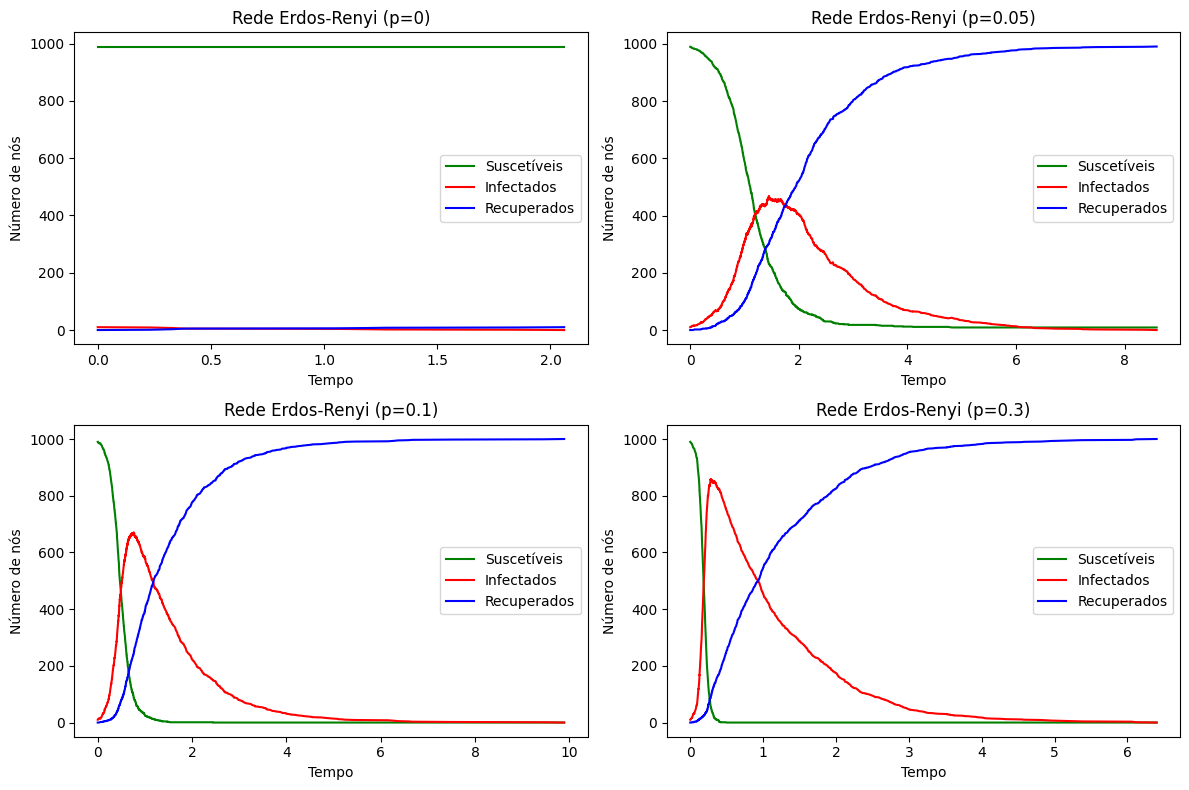

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(t1, S1, 'g-', label='Suscetíveis')
ax1.plot(t1, I1, 'r-', label='Infectados')
ax1.plot(t1, R1, 'b-',  label='Recuperados')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Número de nós')
ax1.set_title('Rede Erdos-Renyi (p=0)')
ax1.legend()

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(t2, S2, 'g-', label='Suscetíveis')
ax2.plot(t2, I2, 'r-', label='Infectados')
ax2.plot(t2, R2, 'b-',  label='Recuperados')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Número de nós')
ax2.set_title('Rede Erdos-Renyi (p=0.05)')
ax2.legend()

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(t3, S3, 'g-', label='Suscetíveis')
ax3.plot(t3, I3, 'r-', label='Infectados')
ax3.plot(t3, R3, 'b-',  label='Recuperados')
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Número de nós')
ax3.set_title('Rede Erdos-Renyi (p=0.1)')
ax3.legend()

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(t4, S4, 'g-', label='Suscetíveis')
ax4.plot(t4, I4, 'r-', label='Infectados')
ax4.plot(t4, R4, 'b-',  label='Recuperados')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Número de nós')
ax4.set_title('Rede Erdos-Renyi (p=0.3)')
ax4.legend()

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

Para a rede com $p = 0$, por conta de não haver interações entre os nós, a epidemia não é propagada. Isto é, apenas os 10 infectados iniciais entram em contato com a doença e, além disso, esses ficam recuperados em um curto período de tempo.

Analisando os gráficos das redes com $p = 0.05$, $p = 0.1$ e $p = 0.3$, é notado que o número de infectados no início da epidemia cresce rapidamente conforme aumenta as probabilidades de criação de arestas.

#### Fração de recuperados em função da taxa de propagação (modelo SIR)

Para fazer a análise da fração de recuperados para cada taxa de propagação, são realizadas 15 simulações das quatro redes geradas e são obtidos os valores médios da fração de recuperados.

In [ ]:
# Definindo os parâmetros da epidemia
tau = list(np.linspace(0,0.12,35))  # Taxas de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
r1 = []
for taxa in tau:
  r = 0
  for i in range(15): #15 simulações para cada valor de tau (ou beta)
    t1_sir, S1_sir, I1_sir, R1_sir = EoN.fast_SIR(GER1, taxa, gamma, initial_infecteds=initial_infections1)
    r += R1_sir[-1]/N
  r1.append(r/15)

r2 = []
for taxa in tau:
  r = 0
  for i in range(15): #15 simulações para cada valor de tau (ou beta)
    t2_sir, S2_sir, I2_sir, R2_sir = EoN.fast_SIR(GER2, taxa, gamma, initial_infecteds=initial_infections2)
    r += R2_sir[-1]/N
  r2.append(r/15)

r3 = []
for taxa in tau:
  r = 0
  for i in range(15): #15 simulações para cada valor de tau (ou beta)
    t3_sir, S3_sir, I3_sir, R3_sir = EoN.fast_SIR(GER3, taxa, gamma, initial_infecteds=initial_infections3)
    r += R3_sir[-1]/N
  r3.append(r/15)

r4 = []
for taxa in tau:
  r = 0
  for i in range(15): #15 simulações para cada valor de tau (ou beta)
    t4_sir, S4_sir, I4_sir, R4_sir = EoN.fast_SIR(GER4, taxa, gamma, initial_infecteds=initial_infections4)
    r += R4_sir[-1]/N
  r4.append(r/15)

Para visualizar a fração de recuperados em função dos diferentes valores da taxa de propagação, considera-se os seguintes gráficos:

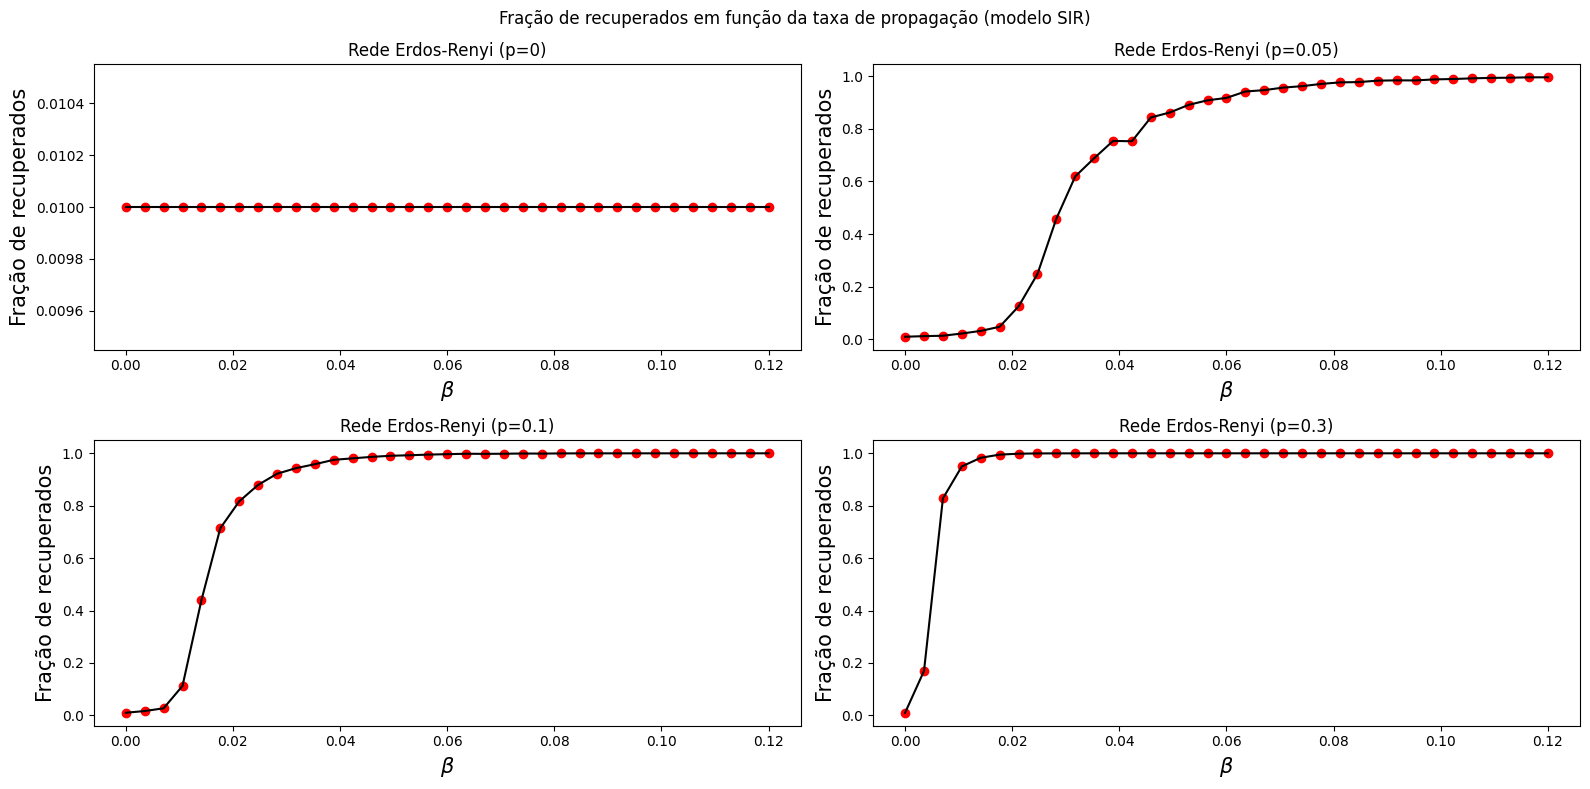

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(tau, r1, 'ro')
ax1.plot(tau, r1, 'k-')
ax1.set_xlabel(r'$\beta$', fontsize = 15)
ax1.set_ylabel('Fração de recuperados', fontsize = 15)
ax1.set_title('Rede Erdos-Renyi (p=0)')

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(tau, r2, 'ro')
ax2.plot(tau, r2, 'k-')
ax2.set_xlabel(r'$\beta$', fontsize = 15)
ax2.set_ylabel('Fração de recuperados', fontsize = 15)
ax2.set_title('Rede Erdos-Renyi (p=0.05)')

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(tau, r3, 'ro')
ax3.plot(tau, r3, 'k-')
ax3.set_xlabel(r'$\beta$', fontsize = 15)
ax3.set_ylabel('Fração de recuperados', fontsize = 15)
ax3.set_title('Rede Erdos-Renyi (p=0.1)')

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(tau, r4, 'ro')
ax4.plot(tau, r4, 'k-')
ax4.set_xlabel(r'$\beta$', fontsize = 15)
ax4.set_ylabel('Fração de recuperados', fontsize = 15)
ax4.set_title('Rede Erdos-Renyi (p=0.3)')

# Ajuste de layout e exibição dos gráficos
plt.suptitle('Fração de recuperados em função da taxa de propagação (modelo SIR)')
plt.tight_layout()
plt.show()

Para a rede com $p=0$, nota-se que a fração de recuperados permanece em $0.01$ para os diferentes valores da taxa de propagação, por conta da falta de interações entre os nós.

Já para as redes com $p = 0.05$, $p = 0.1$ e $p = 0.3$, é notado que a fração de recuperados em função das diferentes taxas de propagação da epidemia aumenta mais rápido conforme o aumento das propabilidades de criação de arestas. Isto é, para redes mais conectadas, com o aumento da taxa de propagação, maior é o número de infectados e, consequentemente, maior é o número de recuperados.

#### Suscetíveis e infectados no modelo SIS

Diferentemente do modelo SIR, no modelo SIS não há indivíduos que são imunizados. Isto é, após um indíviduo pegar uma doença, o mesmo volta a ficar suscetível a pegá-la novamente.

Para simular a epidemia por meio do modelo SIS, utilizamos a função `fast_SIS` da biblioteca EoN. Assim, para iniciar a simulação, são utilizados os 10 infectados iniciais gerados no caso anterior para cada rede gerada.

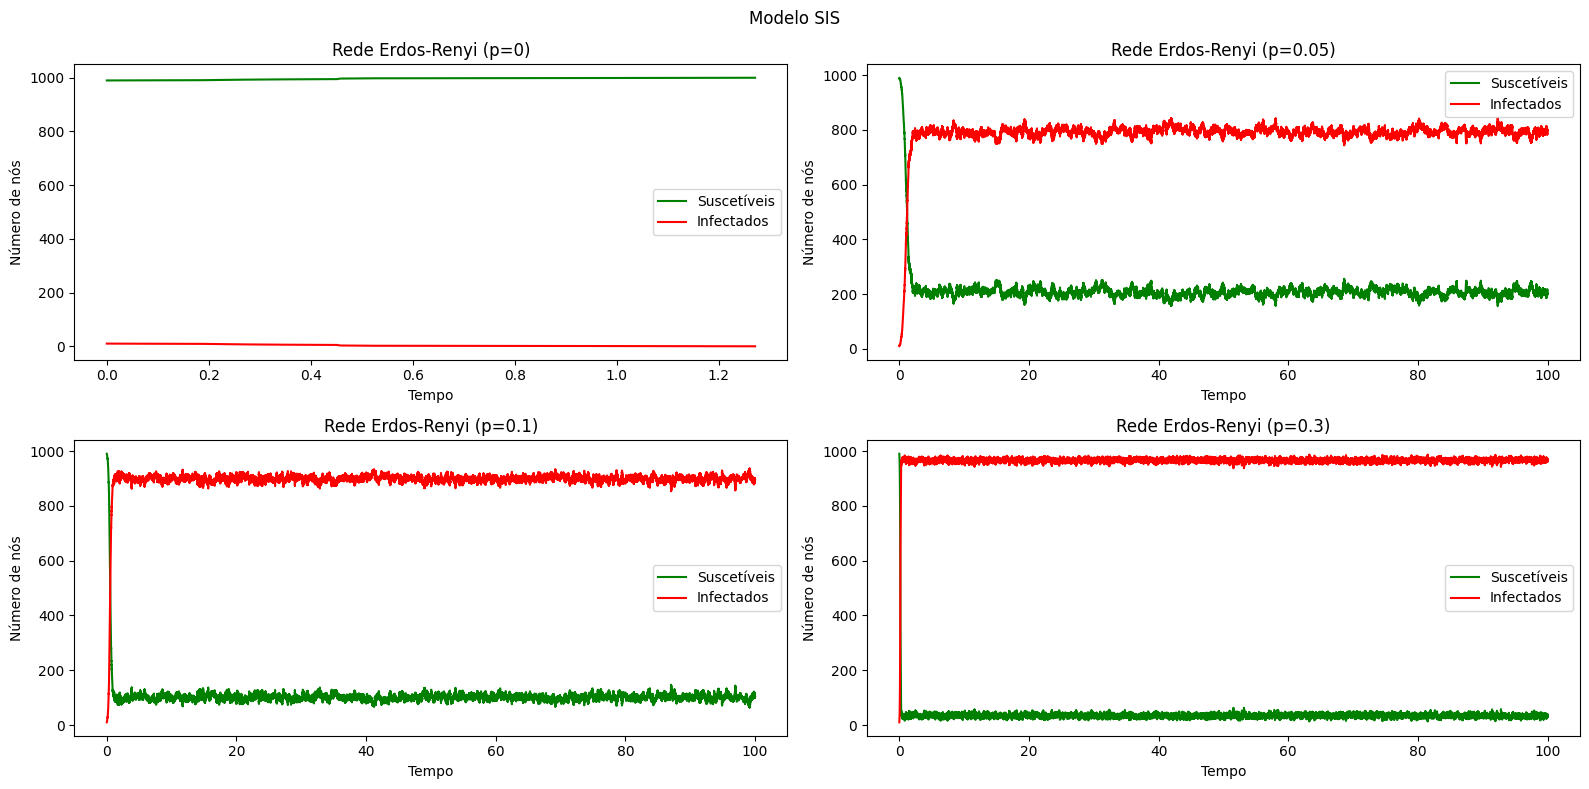

In [ ]:
# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
t1_sis, S1_sis, I1_sis = EoN.fast_SIS(GER1, tau, gamma, initial_infecteds=initial_infections1)
t2_sis, S2_sis, I2_sis = EoN.fast_SIS(GER2, tau, gamma, initial_infecteds=initial_infections2)
t3_sis, S3_sis, I3_sis = EoN.fast_SIS(GER3, tau, gamma, initial_infecteds=initial_infections3)
t4_sis, S4_sis, I4_sis = EoN.fast_SIS(GER4, tau, gamma, initial_infecteds=initial_infections4)

# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(t1_sis, S1_sis, 'g-', label='Suscetíveis')
ax1.plot(t1_sis, I1_sis, 'r-', label='Infectados')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Número de nós')
ax1.set_title('Rede Erdos-Renyi (p=0)')
ax1.legend()

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(t2_sis, S2_sis, 'g-', label='Suscetíveis')
ax2.plot(t2_sis, I2_sis, 'r-', label='Infectados')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Número de nós')
ax2.set_title('Rede Erdos-Renyi (p=0.05)')
ax2.legend()

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(t3_sis, S3_sis, 'g-', label='Suscetíveis')
ax3.plot(t3_sis, I3_sis, 'r-', label='Infectados')
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Número de nós')
ax3.set_title('Rede Erdos-Renyi (p=0.1)')
ax3.legend()

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(t4_sis, S4_sis, 'g-', label='Suscetíveis')
ax4.plot(t4_sis, I4_sis, 'r-', label='Infectados')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Número de nós')
ax4.set_title('Rede Erdos-Renyi (p=0.3)')
ax4.legend()

# Ajuste de layout e exibição dos gráficos
plt.suptitle('Modelo SIS')
plt.tight_layout()
plt.show()

Para a rede com $p = 0$, por conta de não haver interações entre os nós, a epidemia não é propagada. Isto é, apenas os 10 infectados iniciais entram em contato com a doença e, além disso, esses ficam suscetíveis em um curto período de tempo.

Em relação as outras redes geradas, conforme o valor da probabilidade de criação de arestas aumenta, maior é o número de infectados. Assim, para o caso do modelo SIS, conforme o número de infectados aumenta, o número de suscetíveis diminui e vice-versa.

#### Fração de infectados em função da taxa de propagação (modelo SIS)

Para fazer o estudo da fração de infectados para as quatro redes geradas, é feita a simulação da epidemia para diferentes valores da taxa de propagação.

In [ ]:
# Definindo os parâmetros da epidemia
tau = list(np.linspace(0,0.25,11))  # Taxas de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
rho1 = []
rho2 = []
rho3 = []
rho4 = []
for taxa in tau:
  t1_sis, S1_sis, I1_sis = EoN.fast_SIS(GER1, taxa, gamma, initial_infecteds=initial_infections1)
  rho1.append(I1_sis[-1]/N)
  t2_sis, S2_sis, I2_sis = EoN.fast_SIS(GER2, taxa, gamma, initial_infecteds=initial_infections2)
  rho2.append(I2_sis[-1]/N)
  t3_sis, S3_sis, I3_sis = EoN.fast_SIS(GER3, taxa, gamma, initial_infecteds=initial_infections3)
  rho3.append(I3_sis[-1]/N)
  t4_sis, S4_sis, I4_sis = EoN.fast_SIS(GER4, taxa, gamma, initial_infecteds=initial_infections4)
  rho4.append(I4_sis[-1]/N)

Para visualizar as frações de infectados em função de diferentes valores da taxa de propagação, considera-se os seguintes gráficos:

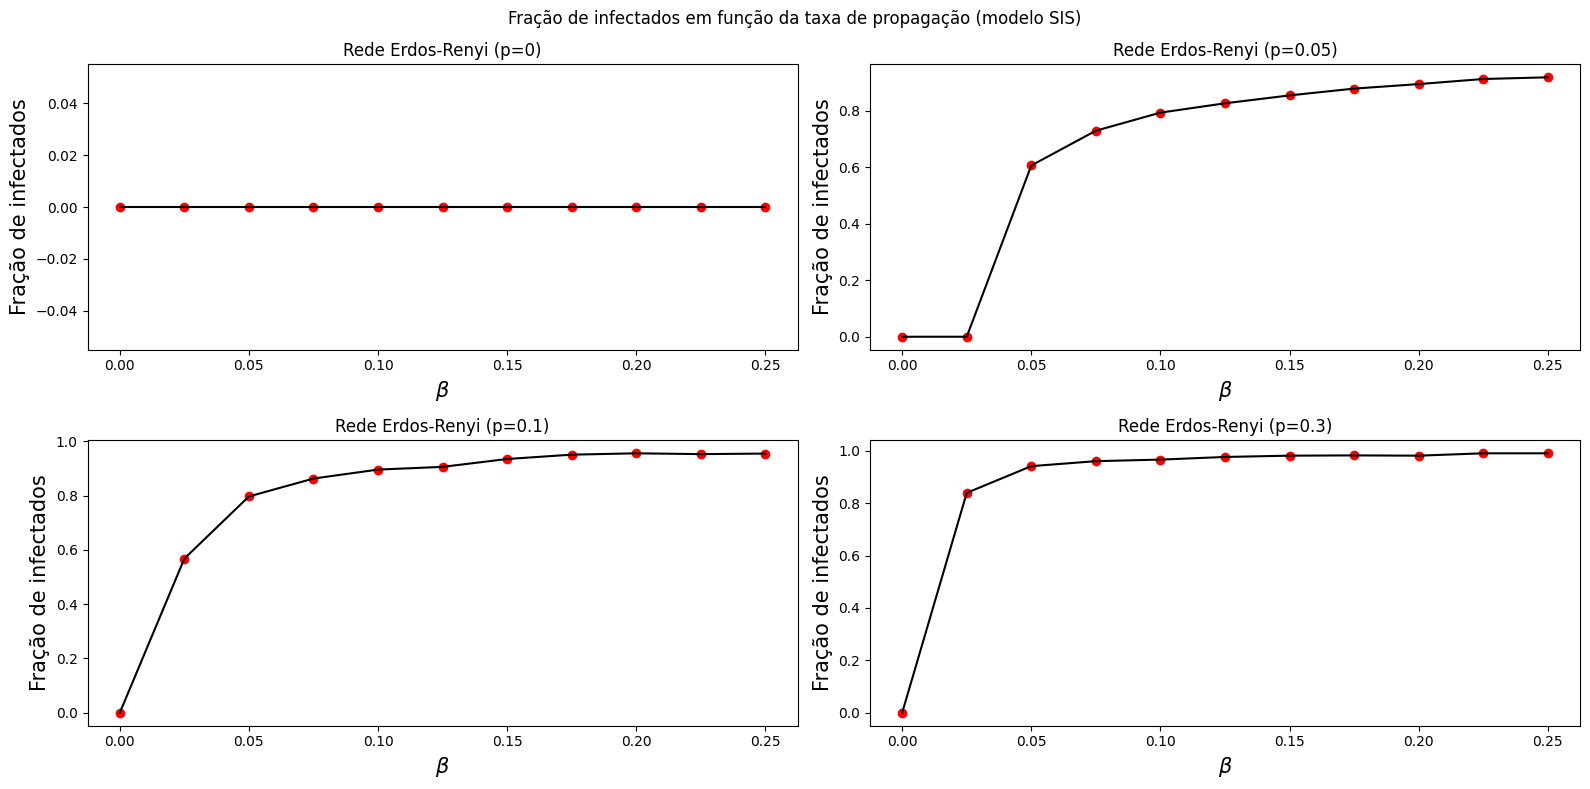

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(tau, rho1, 'ro')
ax1.plot(tau, rho1, 'k-')
ax1.set_xlabel(r'$\beta$', fontsize = 15)
ax1.set_ylabel('Fração de infectados', fontsize = 15)
ax1.set_title('Rede Erdos-Renyi (p=0)')

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(tau, rho2, 'ro')
ax2.plot(tau, rho2, 'k-')
ax2.set_xlabel(r'$\beta$', fontsize = 15)
ax2.set_ylabel('Fração de infectados', fontsize = 15)
ax2.set_title('Rede Erdos-Renyi (p=0.05)')

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(tau, rho3, 'ro')
ax3.plot(tau, rho3, 'k-')
ax3.set_xlabel(r'$\beta$', fontsize = 15)
ax3.set_ylabel('Fração de infectados', fontsize = 15)
ax3.set_title('Rede Erdos-Renyi (p=0.1)')

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(tau, rho4, 'ro')
ax4.plot(tau, rho4, 'k-')
ax4.set_xlabel(r'$\beta$', fontsize = 15)
ax4.set_ylabel('Fração de infectados', fontsize = 15)
ax4.set_title('Rede Erdos-Renyi (p=0.3)')

# Ajuste de layout e exibição dos gráficos
plt.suptitle('Fração de infectados em função da taxa de propagação (modelo SIS)')
plt.tight_layout()
plt.show()

É observado que a fração final de infectados para a rede com $p = 0$ permanece em zero, por conta de não haver interações entre os nós.

Para as outras redes geradas, a fração final de infectados aumenta conforme os valores de probabilidade de criação de arestas e os valores da taxa de propagação aumentam. Ou seja, redes mais conectadas apresentam maiores frações de infectados em função da taxa de propagação.

#### Criando o heatmap da porcentagem de recuperados contra o tempo

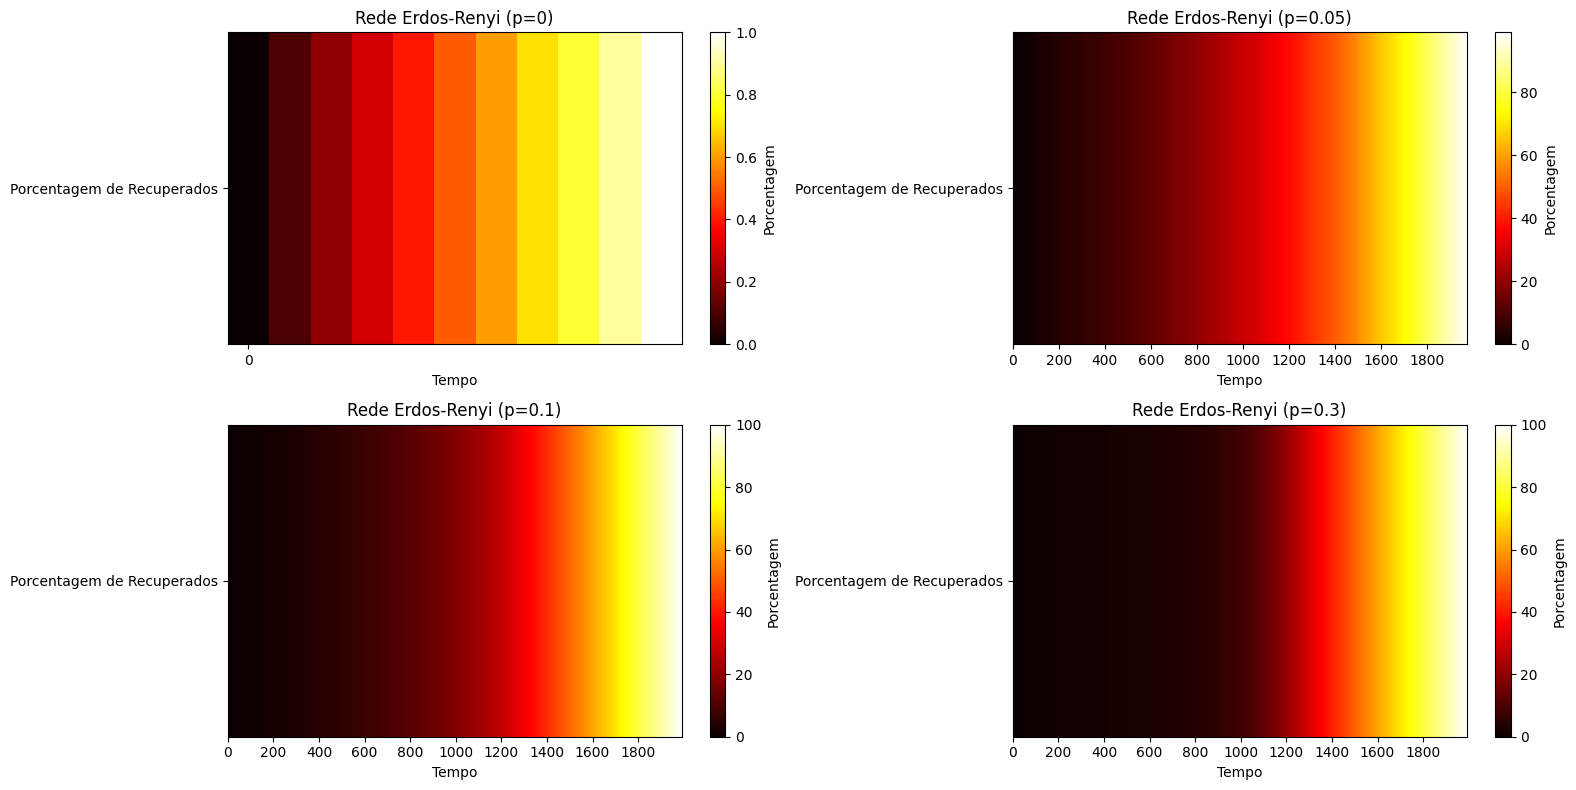

In [ ]:
recuperados1 = (R1/N)*100
recuperados2 = (R2/N)*100
recuperados3 = (R3/N)*100
recuperados4 = (R4/N)*100

# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
heatmap1 = ax1.imshow([recuperados1], cmap='hot', aspect='auto')
ax1.set_xticks(np.arange(0, len(t1), 200))
ax1.set_xticklabels(np.arange(0, len(t1), 200))
ax1.set_xlabel('Tempo')
ax1.set_yticks([0])
ax1.set_yticklabels(['Porcentagem de Recuperados'])
cbar1 = plt.colorbar(heatmap1, ax=ax1)
cbar1.set_label('Porcentagem')
ax1.set_title('Rede Erdos-Renyi (p=0)')

# Plot do segundo gráfico
ax2 = axes[0,1]
heatmap2 = ax2.imshow([recuperados2], cmap='hot', aspect='auto')
ax2.set_xticks(np.arange(0, len(t2), 200))
ax2.set_xticklabels(np.arange(0, len(t2), 200))
ax2.set_xlabel('Tempo')
ax2.set_yticks([0])
ax2.set_yticklabels(['Porcentagem de Recuperados'])
cbar2 = plt.colorbar(heatmap2, ax=ax2)
cbar2.set_label('Porcentagem')
ax2.set_title('Rede Erdos-Renyi (p=0.05)')

# Plot do terceiro gráfico
ax3 = axes[1,0]
heatmap3 = ax3.imshow([recuperados3], cmap='hot', aspect='auto')
ax3.set_xticks(np.arange(0, len(t3), 200))
ax3.set_xticklabels(np.arange(0, len(t3), 200))
ax3.set_xlabel('Tempo')
ax3.set_yticks([0])
ax3.set_yticklabels(['Porcentagem de Recuperados'])
cbar1 = plt.colorbar(heatmap3, ax=ax3)
cbar1.set_label('Porcentagem')
ax3.set_title('Rede Erdos-Renyi (p=0.1)')

# Plot do quarto gráfico
ax4 = axes[1,1]
heatmap4 = ax4.imshow([recuperados4], cmap='hot', aspect='auto')
ax4.set_xticks(np.arange(0, len(t4), 200))
ax4.set_xticklabels(np.arange(0, len(t4), 200))
ax4.set_xlabel('Tempo')
ax4.set_yticks([0])
ax4.set_yticklabels(['Porcentagem de Recuperados'])
cbar2 = plt.colorbar(heatmap4, ax=ax4)
cbar2.set_label('Porcentagem')
ax4.set_title('Rede Erdos-Renyi (p=0.3)')

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

A análise dos heatmaps acima indica que quanto maior a probabilidade de criação de arestas, menor a porcentagem de recuperados ao longo do tempo. Ou seja, redes mais conectadas apresentam menor taxa de recuperados ao longo do tempo.

#### Analisando o impacto da vacinação aleatória

Analisamos o impacto da vacinação aleatória considerando que vacinados não serão mais infectados. Consideramos uma taxa de vacinação de $2\%$ e selecionamos nós aleatórios para a vacinação.

In [ ]:
tau = 0.1

# Taxa de vacinação
vaccination_rate = 0.2
num_vaccinated1 = min(int(vaccination_rate * N), N)
num_vaccinated2 = min(int(vaccination_rate * N), N)
num_vaccinated3 = min(int(vaccination_rate * N), N)
num_vaccinated4 = min(int(vaccination_rate * N), N)

# Selecionando nós aleatórios para a vacinação
vaccinated_nodes1 = list(np.random.choice(list(GER1.nodes()), num_vaccinated1, replace=False))
vaccinated_nodes2 = list(np.random.choice(list(GER2.nodes()), num_vaccinated2, replace=False))
vaccinated_nodes3 = list(np.random.choice(list(GER3.nodes()), num_vaccinated3, replace=False))
vaccinated_nodes4 = list(np.random.choice(list(GER4.nodes()), num_vaccinated4, replace=False))

# Criando uma cópia do grafo sem vacinação
GER1_vaccinated = GER1.copy()
GER2_vaccinated = GER2.copy()
GER3_vaccinated = GER3.copy()
GER4_vaccinated = GER4.copy()

# Removendo os nós vacinados
GER1_vaccinated.remove_nodes_from(vaccinated_nodes1)
GER2_vaccinated.remove_nodes_from(vaccinated_nodes2)
GER3_vaccinated.remove_nodes_from(vaccinated_nodes3)
GER4_vaccinated.remove_nodes_from(vaccinated_nodes4)

# Definindo o estado inicial dos nós
initial_infections1 = list(np.random.choice(list(GER1_vaccinated.nodes()), 10, replace=False))
initial_infections2 = list(np.random.choice(list(GER2_vaccinated.nodes()), 10, replace=False))
initial_infections3 = list(np.random.choice(list(GER3_vaccinated.nodes()), 10, replace=False))
initial_infections4 = list(np.random.choice(list(GER4_vaccinated.nodes()), 10, replace=False))

# Simulando a propagação da epidemia sem vacinação
t1, S1, I1, R1 = EoN.fast_SIR(GER1, tau, gamma, initial_infecteds=initial_infections1)
t2, S2, I2, R2 = EoN.fast_SIR(GER2, tau, gamma, initial_infecteds=initial_infections2)
t3, S3, I3, R3 = EoN.fast_SIR(GER3, tau, gamma, initial_infecteds=initial_infections3)
t4, S4, I4, R4 = EoN.fast_SIR(GER4, tau, gamma, initial_infecteds=initial_infections4)

# Simulando a propagação da epidemia com vacinação
t1_vac, S1_vac, I1_vac, R1_vac = EoN.fast_SIR(GER1_vaccinated, tau, gamma, initial_infecteds=initial_infections1)
t2_vac, S2_vac, I2_vac, R2_vac = EoN.fast_SIR(GER2_vaccinated, tau, gamma, initial_infecteds=initial_infections2)
t3_vac, S3_vac, I3_vac, R3_vac = EoN.fast_SIR(GER3_vaccinated, tau, gamma, initial_infecteds=initial_infections3)
t4_vac, S4_vac, I4_vac, R4_vac = EoN.fast_SIR(GER4_vaccinated, tau, gamma, initial_infecteds=initial_infections4)

# Calculando a porcentagem de infectados pelo tempo
percentage_infected1 = (I1 / N) * 100
percentage_infected1_vac = (I1_vac / N) * 100

percentage_infected2 = (I2 / N) * 100
percentage_infected2_vac = (I2_vac / N) * 100

percentage_infected3 = (I3 / N) * 100
percentage_infected3_vac = (I3_vac / N) * 100

percentage_infected4 = (I4 / N) * 100
percentage_infected4_vac = (I4_vac / N) * 100

Para visualizar a porcentagem de infectados em função do tempo, considerando a vacinação aleatória, consideramos os seguintes gráficos:

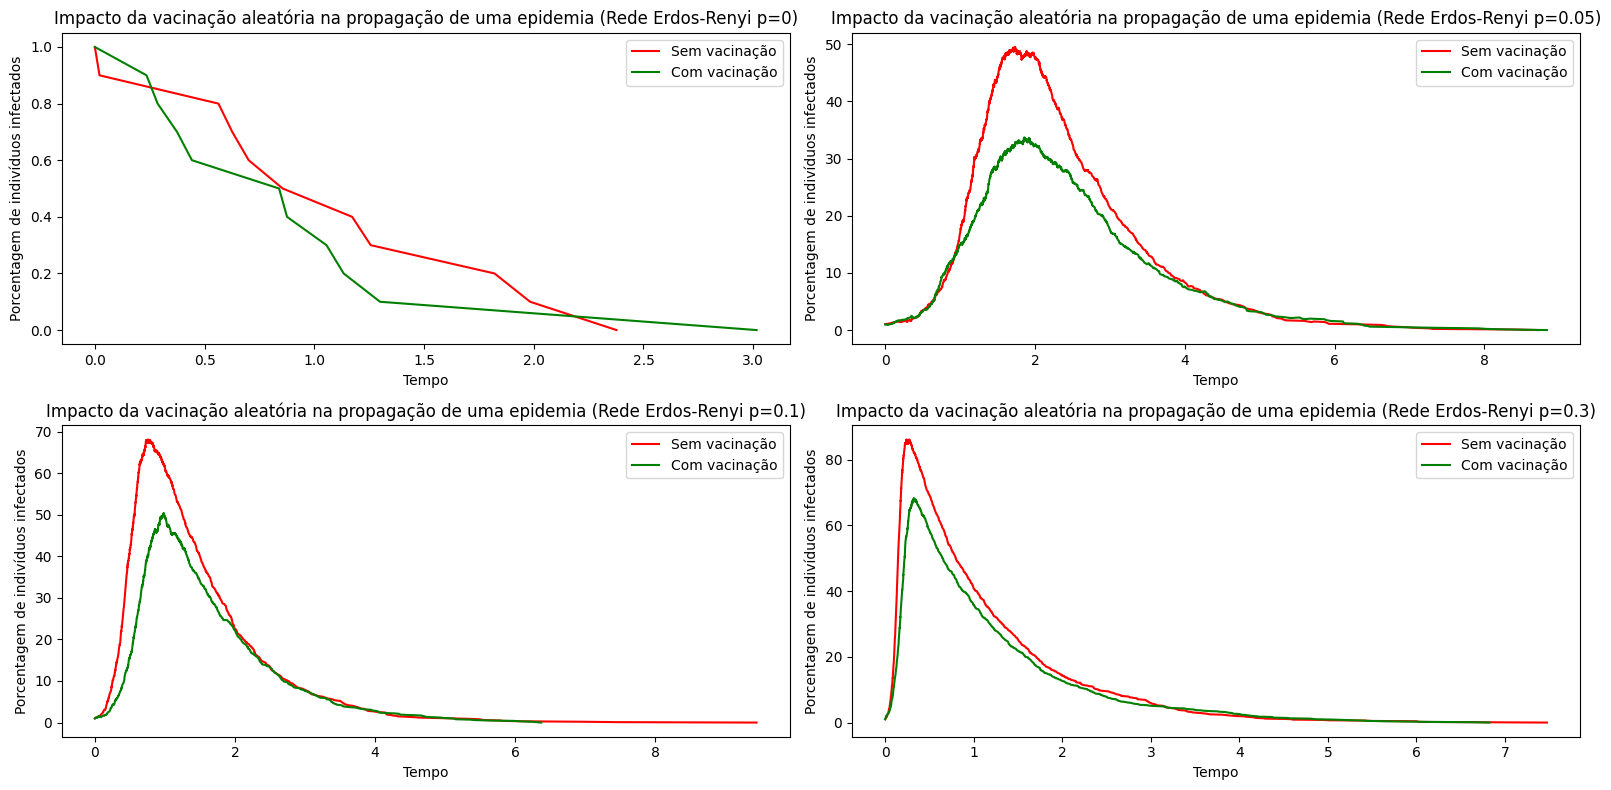

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(t1, percentage_infected1, label='Sem vacinação', color='r')
ax1.plot(t1_vac, percentage_infected1_vac, label='Com vacinação', color='green')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Porcentagem de indivíduos infectados')
ax1.set_title('Impacto da vacinação aleatória na propagação de uma epidemia (Rede Erdos-Renyi p=0)')
ax1.legend()

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(t2, percentage_infected2, label='Sem vacinação', color='r')
ax2.plot(t2_vac, percentage_infected2_vac, label='Com vacinação', color='green')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Porcentagem de indivíduos infectados')
ax2.set_title('Impacto da vacinação aleatória na propagação de uma epidemia (Rede Erdos-Renyi p=0.05)')
ax2.legend()

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(t3, percentage_infected3, label='Sem vacinação', color='r')
ax3.plot(t3_vac, percentage_infected3_vac, label='Com vacinação', color='green')
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Porcentagem de indivíduos infectados')
ax3.set_title('Impacto da vacinação aleatória na propagação de uma epidemia (Rede Erdos-Renyi p=0.1)')
ax3.legend()

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(t4, percentage_infected4, label='Sem vacinação', color='r')
ax4.plot(t4_vac, percentage_infected4_vac, label='Com vacinação', color='green')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Porcentagem de indivíduos infectados')
ax4.set_title('Impacto da vacinação aleatória na propagação de uma epidemia (Rede Erdos-Renyi p=0.3)')
ax4.legend()

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

Observamos que a vacinação aleatória para a rede com $p=0$ não produz resultados, por conta de não haver interações entre os nós.

Já para os outros valores da probabilidade de criação de arestas, percebemos que a vacinação aleatória teve um impacto positivo, de forma que a curva da porcentagem de indivíduos infectados sem a vacinação aleatória apresenta um máximo maior que o de indivíduos infectados com a vacinação aleatória.

#### Analisando o impacto da vacinação de acordo com Hubs

Para analisar o impacto da vacinação de acordo com os hubs, identificamos os nós com maior grau para vacinação.

In [ ]:
# Identificando os nós com maior grau (hubs)
degrees1 = dict(GER1.degree())
hub_nodes1 = [node for node, degree in degrees1.items() if degree >= np.percentile(list(degrees1.values()), 90)]

degrees2 = dict(GER2.degree())
hub_nodes2 = [node for node, degree in degrees2.items() if degree >= np.percentile(list(degrees2.values()), 90)]

degrees3 = dict(GER3.degree())
hub_nodes3 = [node for node, degree in degrees3.items() if degree >= np.percentile(list(degrees3.values()), 90)]

degrees4 = dict(GER4.degree())
hub_nodes4 = [node for node, degree in degrees4.items() if degree >= np.percentile(list(degrees4.values()), 90)]

# Vacinação dos hubs
vaccinated_nodes1 = hub_nodes1
susceptible_nodes1 = set(range(N)) - set(vaccinated_nodes1)
vaccinated_nodes2 = hub_nodes2
susceptible_nodes2 = set(range(N)) - set(vaccinated_nodes2)
vaccinated_nodes3 = hub_nodes3
susceptible_nodes3 = set(range(N)) - set(vaccinated_nodes3)
vaccinated_nodes4 = hub_nodes4
susceptible_nodes4 = set(range(N)) - set(vaccinated_nodes4)

# Simulando a propagação da epidemia
t1_hub, S1_hub, I1_hub, R1_hub = EoN.fast_SIR(GER1, tau, gamma, initial_infecteds=initial_infections1, initial_recovereds=vaccinated_nodes1)
t2_hub, S2_hub, I2_hub, R2_hub = EoN.fast_SIR(GER2, tau, gamma, initial_infecteds=initial_infections2, initial_recovereds=vaccinated_nodes2)
t3_hub, S3_hub, I3_hub, R3_hub = EoN.fast_SIR(GER3, tau, gamma, initial_infecteds=initial_infections3, initial_recovereds=vaccinated_nodes3)
t4_hub, S4_hub, I4_hub, R4_hub = EoN.fast_SIR(GER4, tau, gamma, initial_infecteds=initial_infections4, initial_recovereds=vaccinated_nodes4)


# Calculando a porcentagem de infectados pelo tempo
percentage_infected1 = (I1 / N) * 100
percentage_infected1_hub = (I1_hub / N) * 100
percentage_infected2 = (I2 / N) * 100
percentage_infected2_hub = (I2_hub / N) * 100
percentage_infected3 = (I3 / N) * 100
percentage_infected3_hub = (I3_hub / N) * 100
percentage_infected4 = (I4 / N) * 100
percentage_infected4_hub = (I4_hub / N) * 100

Para visualizar a porcentagem de infectados em função do tempo, considerando a vacinação dos hubs, consideramos os seguintes gráficos:

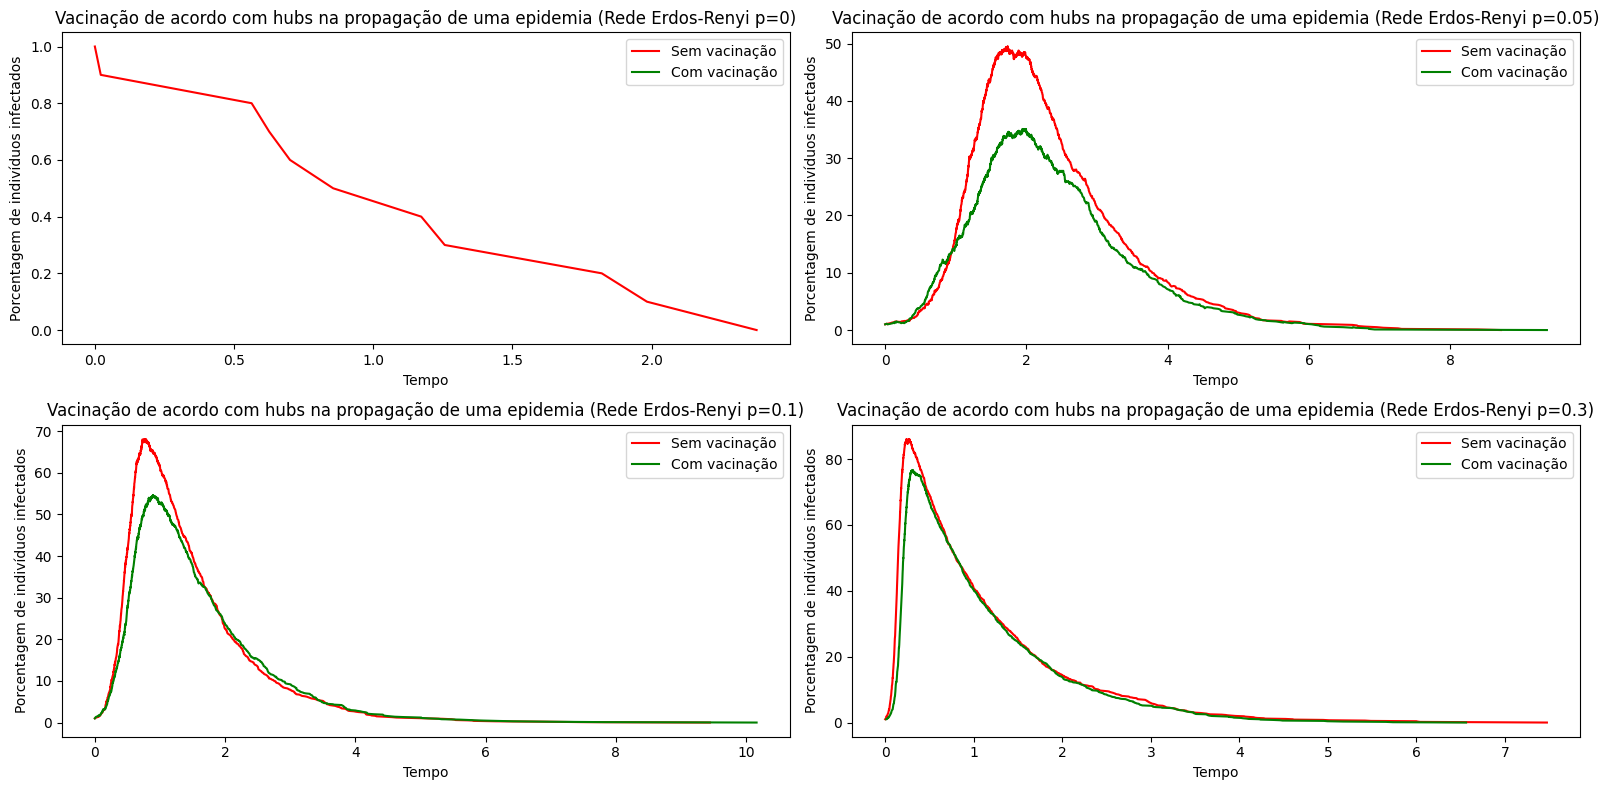

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(t1, percentage_infected1, label='Sem vacinação', color='r')
ax1.plot(t1_hub, percentage_infected1_hub, label='Com vacinação', color='green')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Porcentagem de indivíduos infectados')
ax1.set_title('Vacinação de acordo com hubs na propagação de uma epidemia (Rede Erdos-Renyi p=0)')
ax1.legend()

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(t2, percentage_infected2, label='Sem vacinação', color='r')
ax2.plot(t2_hub, percentage_infected2_hub, label='Com vacinação', color='green')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Porcentagem de indivíduos infectados')
ax2.set_title('Vacinação de acordo com hubs na propagação de uma epidemia (Rede Erdos-Renyi p=0.05)')
ax2.legend()

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(t3, percentage_infected3, label='Sem vacinação', color='r')
ax3.plot(t3_hub, percentage_infected3_hub, label='Com vacinação', color='green')
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Porcentagem de indivíduos infectados')
ax3.set_title('Vacinação de acordo com hubs na propagação de uma epidemia (Rede Erdos-Renyi p=0.1)')
ax3.legend()

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(t4, percentage_infected4, label='Sem vacinação', color='r')
ax4.plot(t4_hub, percentage_infected4_hub, label='Com vacinação', color='green')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Porcentagem de indivíduos infectados')
ax4.set_title('Vacinação de acordo com hubs na propagação de uma epidemia (Rede Erdos-Renyi p=0.3)')
ax4.legend()

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

Observamos que a vacinação de acordo com hubs para a rede com $p=0$ não produz resultados significativos, por conta de não haver interações entre os nós.

Já para os outros valores da probabilidade de criação de arestas, percebemos que a vacinação de acordo com hubs teve um impacto positivo, de forma que a curva da porcentagem de indivíduos infectados sem a vacinação de acordo com hubs apresenta um máximo maior que o de indivíduos infectados com a vacinação de acordo com hubs.

Em comparação com a vacinação aleatória, a vacinação de acordo com hubs apresenta curvas de infectados ligeiramente maiores. Ou seja, a vacinação aleatória apresentou resultados melhores em reduzir a porcentagem de infectados ao longo do tempo.

#### Analisando o impacto da vacinação de acordo com medidas de centralidade (centralidade do grau)

Para analisar o impacto da vacinação de acordo com a centralidade do grau, primeiro definimos em $2\%$ a fração da população vacinada, em seguida obtemos a centralidade dos nós da rede e selecionamos apenas os nós mais centrais para vacinação.

In [ ]:
# Defina a fração da população vacinada
vaccinated_fraction = 0.2

# Obtenha a centralidade dos nós na rede
centrality1 = nx.degree_centrality(GER1)
centrality2 = nx.degree_centrality(GER2)
centrality3 = nx.degree_centrality(GER3)
centrality4 = nx.degree_centrality(GER4)

# Ordene os nós por centralidade (do mais central para o menos central)
sorted_nodes1 = sorted(centrality1, key=centrality1.get, reverse=True)
sorted_nodes2 = sorted(centrality2, key=centrality2.get, reverse=True)
sorted_nodes3 = sorted(centrality3, key=centrality3.get, reverse=True)
sorted_nodes4 = sorted(centrality4, key=centrality4.get, reverse=True)

# Selecione os nós mais centrais para vacinação
num_nodes_to_vaccinate1 = int(vaccinated_fraction * N)
vaccinated_nodes1 = sorted_nodes1[:num_nodes_to_vaccinate1]

num_nodes_to_vaccinate2 = int(vaccinated_fraction * N)
vaccinated_nodes2 = sorted_nodes2[:num_nodes_to_vaccinate2]

num_nodes_to_vaccinate3 = int(vaccinated_fraction * N)
vaccinated_nodes3 = sorted_nodes3[:num_nodes_to_vaccinate3]

num_nodes_to_vaccinate4 = int(vaccinated_fraction * N)
vaccinated_nodes4 = sorted_nodes4[:num_nodes_to_vaccinate4]

# Crie um dicionário de estado inicial para a simulação
initial_status1 = {node: 'S' for node in GER1.nodes()}
for node in vaccinated_nodes1:
    initial_status1[node] = 'V'

initial_status2 = {node: 'S' for node in GER2.nodes()}
for node in vaccinated_nodes2:
    initial_status2[node] = 'V'

initial_status3 = {node: 'S' for node in GER3.nodes()}
for node in vaccinated_nodes3:
    initial_status3[node] = 'V'

initial_status4 = {node: 'S' for node in GER4.nodes()}
for node in vaccinated_nodes4:
    initial_status4[node] = 'V'

susceptible_nodes1 = list(filter(lambda x: initial_status1[x] == 'S',initial_status1))
initial_infections1 = list(np.random.choice(susceptible_nodes1, 10, replace=False))

susceptible_nodes2 = list(filter(lambda x: initial_status2[x] == 'S',initial_status2))
initial_infections2 = list(np.random.choice(susceptible_nodes2, 10, replace=False))

susceptible_nodes3 = list(filter(lambda x: initial_status3[x] == 'S',initial_status3))
initial_infections3 = list(np.random.choice(susceptible_nodes3, 10, replace=False))

susceptible_nodes4 = list(filter(lambda x: initial_status4[x] == 'S',initial_status4))
initial_infections4 = list(np.random.choice(susceptible_nodes4, 10, replace=False))


# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Realize a simulação da epidemia usando a biblioteca EoN
t1_vac, S1_vac, I1_vac, R1_vac = EoN.fast_SIR(GER1, tau, gamma, initial_infecteds=initial_infections1, initial_recovereds=vaccinated_nodes1)
t2_vac, S2_vac, I2_vac, R2_vac = EoN.fast_SIR(GER2, tau, gamma, initial_infecteds=initial_infections2, initial_recovereds=vaccinated_nodes2)
t3_vac, S3_vac, I3_vac, R3_vac = EoN.fast_SIR(GER3, tau, gamma, initial_infecteds=initial_infections3, initial_recovereds=vaccinated_nodes3)
t4_vac, S4_vac, I4_vac, R4_vac = EoN.fast_SIR(GER4, tau, gamma, initial_infecteds=initial_infections4, initial_recovereds=vaccinated_nodes4)

# Calculando a porcentagem de infectados pelo tempo
percentage_infected1 = (I1 / N) * 100
percentage_infected1_vac = (I1_vac / N) * 100
percentage_infected2 = (I2 / N) * 100
percentage_infected2_vac = (I2_vac / N) * 100
percentage_infected3 = (I3 / N) * 100
percentage_infected3_vac = (I3_vac / N) * 100
percentage_infected4 = (I4 / N) * 100
percentage_infected4_vac = (I4_vac / N) * 100

Para visualizar a porcentagem de infectados em função do tempo, considerando a vacinação de acordo com a centralidade do grau, consideramos os seguintes gráficos:

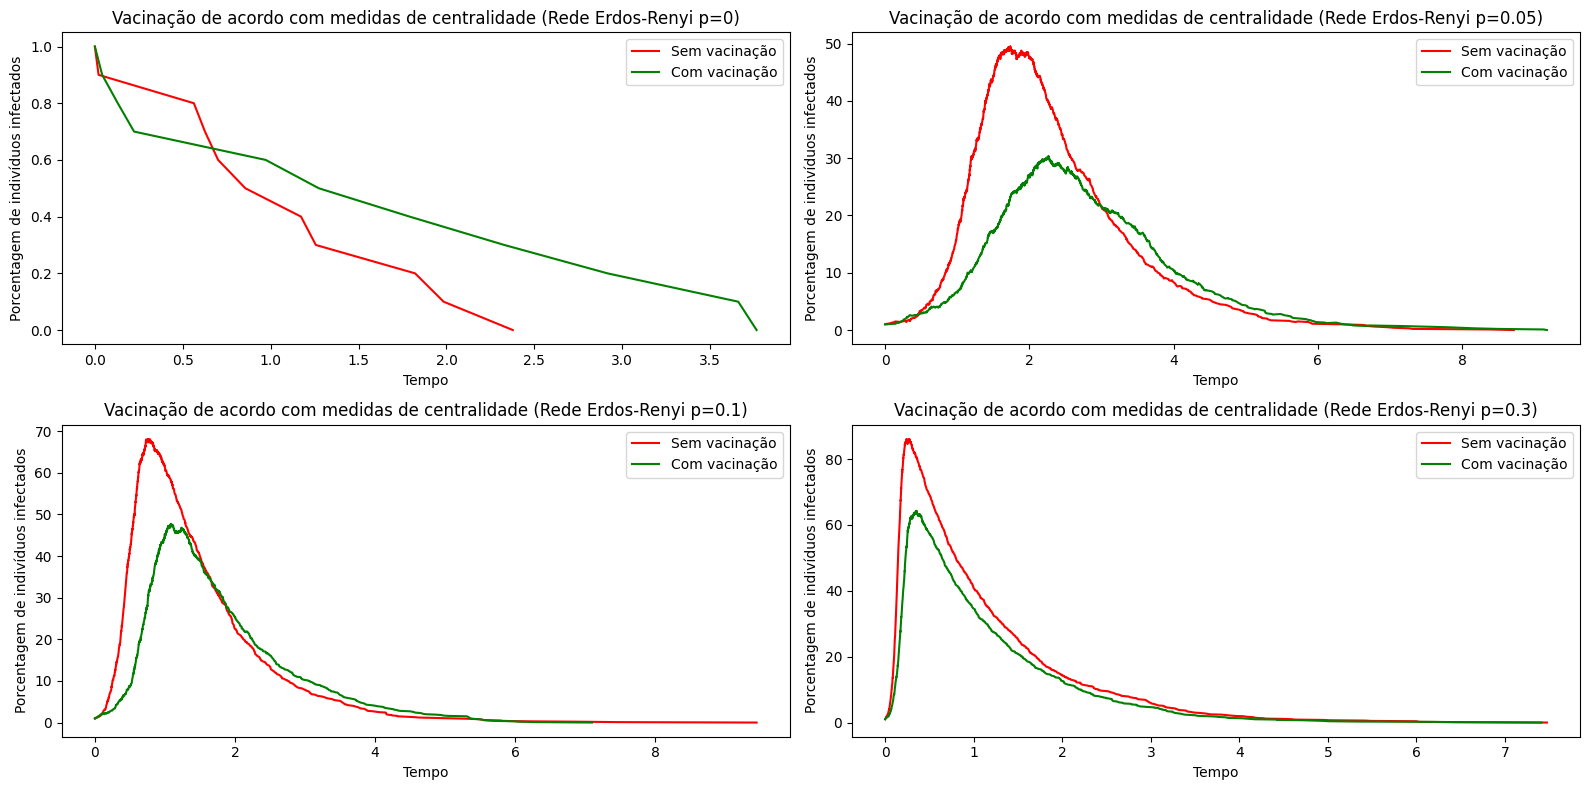

In [ ]:
# Configuração dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Plot do primeiro gráfico
ax1 = axes[0,0]
ax1.plot(t1, percentage_infected1, label='Sem vacinação', color='r')
ax1.plot(t1_vac, percentage_infected1_vac, label='Com vacinação', color='green')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Porcentagem de indivíduos infectados')
ax1.set_title('Vacinação de acordo com a centralidade do grau (Rede Erdos-Renyi p=0)')
ax1.legend()

# Plot do segundo gráfico
ax2 = axes[0,1]
ax2.plot(t2, percentage_infected2, label='Sem vacinação', color='r')
ax2.plot(t2_vac, percentage_infected2_vac, label='Com vacinação', color='green')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Porcentagem de indivíduos infectados')
ax2.set_title('Vacinação de acordo com a centralidade do grau (Rede Erdos-Renyi p=0.05)')
ax2.legend()

# Plot do terceiro gráfico
ax3 = axes[1,0]
ax3.plot(t3, percentage_infected3, label='Sem vacinação', color='r')
ax3.plot(t3_vac, percentage_infected3_vac, label='Com vacinação', color='green')
ax3.set_xlabel('Tempo')
ax3.set_ylabel('Porcentagem de indivíduos infectados')
ax3.set_title('Vacinação de acordo com a centralidade do grau (Rede Erdos-Renyi p=0.1)')
ax3.legend()

# Plot do quarto gráfico
ax4 = axes[1,1]
ax4.plot(t4, percentage_infected4, label='Sem vacinação', color='r')
ax4.plot(t4_vac, percentage_infected4_vac, label='Com vacinação', color='green')
ax4.set_xlabel('Tempo')
ax4.set_ylabel('Porcentagem de indivíduos infectados')
ax4.set_title('Vacinação de acordo com a centralidade do grau (Rede Erdos-Renyi p=0.3)')
ax4.legend()

# Ajuste de layout e exibição dos gráficos
plt.tight_layout()
plt.show()

Observamos que a vacinação de acordo com a centralidade do grau para a rede com $p=0$ não produz bons resultados, por conta de não haver interações entre os nós.

Já para os outros valores da probabilidade de criação de arestas, percebemos que a vacinação de acordo com a centralidade do grau teve um impacto positivo, de forma que a curva da porcentagem de indivíduos infectados sem a vacinação de acordo com a centralidade do grau apresenta um máximo maior que o de indivíduos infectados com a vacinação de acordo com a centralidade do grau.

Além disso, em comparação com a vacinação aleatória e a vacinação de acordo com hubs, a vacinação de acordo com a centralidade do grau aparenta reduzir mais a porcentagem de infectados ao longo do tempo.

### **3.2) Rede de Aeroportos USairport500**

Analisaremos a rede de Aeroportos *USairport500*. Os nós dessa rede são os 500 aeroportos comerciais mais movimentados dos Estados Unidos.

#### Importando os dados

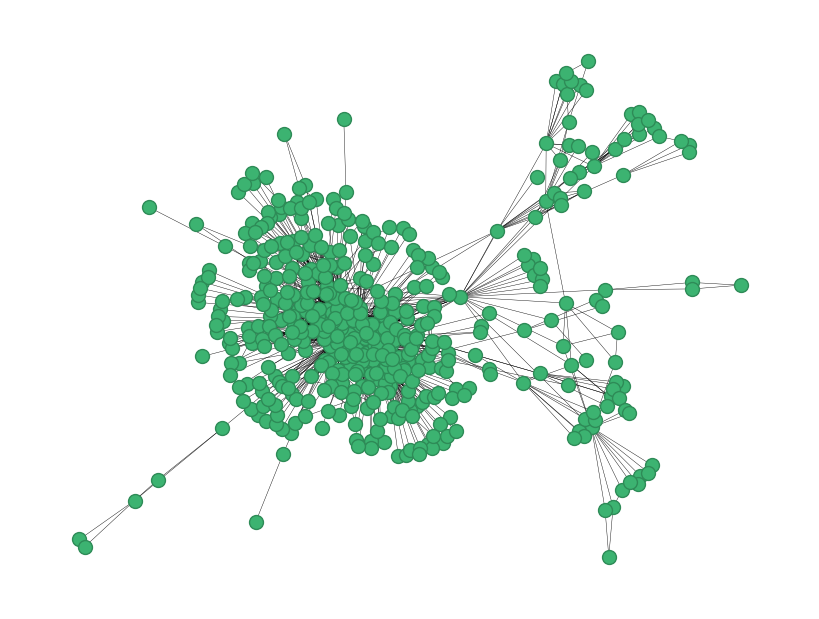

In [4]:
# Leitura da rede com a função  read_edgelist.
G2 = nx.read_edgelist("USairport500.txt", nodetype=int)

# Visualização da rede em um grafo
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="#3CB371", node_size=100, with_labels=False, edgecolors='#2E8B57', width=0.3)

#### Formatando a rede

In [5]:
# Transformamos a rede para a versão não dirigida.
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))

# Consideramos o maior componente da rede
Gcc2 = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(Gcc2[0])

# Convertemos os labels para inteiros para facilitar a implementação
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

# Número de nós e vértices da rede
N5 = len(G2)
M5 = G2.number_of_edges()

#### Suscetíveis, infectados e recuperados no modelo SIR

Para simular a epidemia por meio do modelo SIR, utilizamos a função `fast_SIR` da biblioteca EoN. Assim, para iniciar a simulação, é feita a escolha aleatória de 10 infectados iniciais para cada rede gerada.

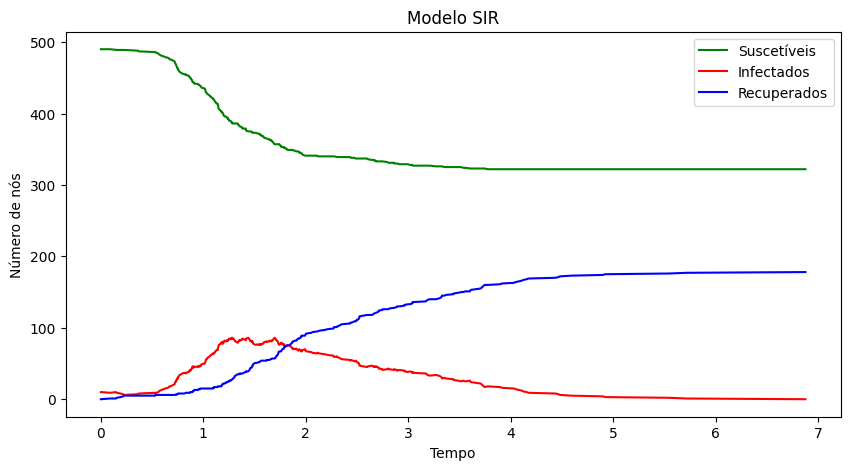

In [6]:
# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Definindo o estado inicial dos nós
initial_infections5 = list(np.random.choice(list(G2.nodes()), 10, replace=False))

# Simulando a propagação da epidemia
t5, S5, I5, R5 = EoN.fast_SIR(G2, tau, gamma, initial_infecteds=initial_infections5)

plt.figure(figsize=(10,5))
plt.plot(t5, S5, 'g-', label='Suscetíveis')
plt.plot(t5, I5, 'r-', label='Infectados')
plt.plot(t5, R5, 'b-',  label='Recuperados')
plt.xlabel('Tempo')
plt.ylabel('Número de nós')
plt.legend()
plt.title('Modelo SIR')
plt.show()

Percebemos pelo gráfico que as taxas de infectados alguma hora chegará a zero e as outras taxas ficaram constantes.

#### Fração de recuperados em função da taxa de propagação (modelo SIR)

Para fazer a análise da fração de recuperados para cada taxa de propagação, são realizadas 50 simulações e são obtidos os valores médios da fração de recuperados.

In [7]:
# Definindo os parâmetros da epidemia
tau = list(np.linspace(0,2,40))  # Taxas de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
r5 = []
for taxa in tau:
  r = 0
  for i in range(50): #50 simulações para cada valor de tau (ou beta)
    t5_sir, S5_sir, I5_sir, R5_sir = EoN.fast_SIR(G2, taxa, gamma, initial_infecteds=initial_infections5)
    r += R5_sir[-1]/N5
  r5.append(r/50)

Para visualizar a fração de recuperados em função dos diferentes valores da taxa de propagação, considera-se o seguinte gráfico:

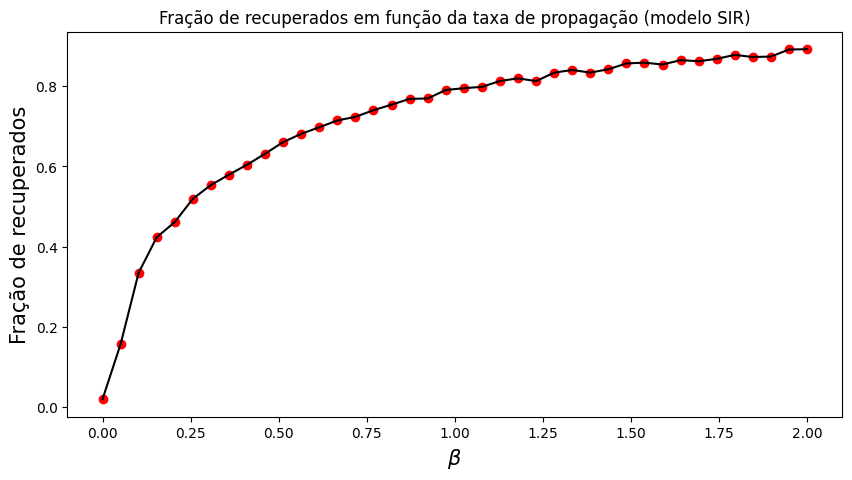

In [8]:
plt.figure(figsize=(10,5))
plt.plot(tau, r5, 'ro')
plt.plot(tau, r5, 'k-')
plt.xlabel(r'$\beta$', fontsize = 15)
plt.ylabel('Fração de recuperados', fontsize = 15)
plt.title('Fração de recuperados em função da taxa de propagação (modelo SIR)')
plt.show()

#### Suscetíveis e infectados no modelo SIS

Diferentemente do modelo SIR, no modelo SIS não há indivíduos que são imunizados. Isto é, após um indíviduo pegar uma doença, o mesmo volta a ficar suscetível a pegá-la novamente.

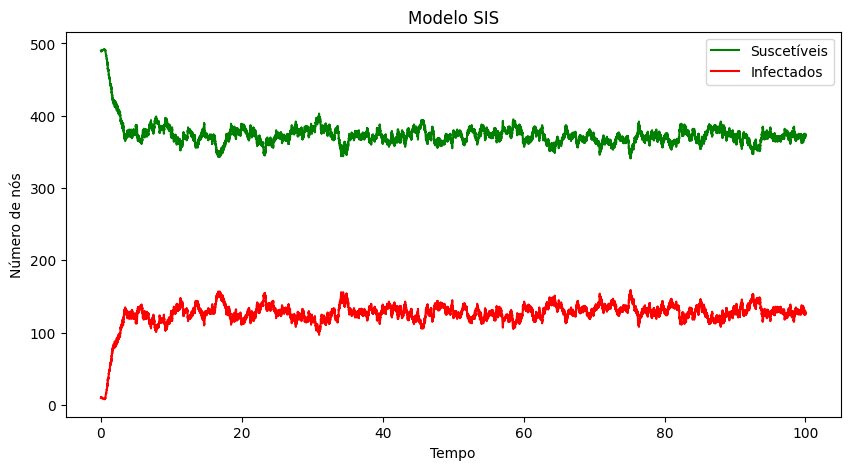

In [9]:
# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
t5_sis, S5_sis, I5_sis = EoN.fast_SIS(G2, tau, gamma, initial_infecteds=initial_infections5)

plt.figure(figsize=(10,5))
plt.plot(t5_sis, S5_sis, 'g-', label='Suscetíveis')
plt.plot(t5_sis, I5_sis, 'r-', label='Infectados')
plt.xlabel('Tempo')
plt.ylabel('Número de nós')
plt.legend()
plt.title('Modelo SIS')
plt.show()

Pelo gráfico, podemos dizer que jamais o número de infectados será igual ao número de suscetíveis. O número de suscetíveis será sempre maior.

#### Fração de infectados em função da taxa de propagação (modelo SIS)

Para o estudo da fração de infectados no modelo SIS, é feita a simulação da epidemia para diferentes valores da taxa de propagação.

In [10]:
# Definindo os parâmetros da epidemia
tau = list(np.linspace(0,2,21))  # Taxas de transmissão
gamma = 1  # Taxa de recuperação

# Simulando a propagação da epidemia
rho5 = []
for taxa in tau:
  t5_sis, S5_sis, I5_sis = EoN.fast_SIS(G2, taxa, gamma, initial_infecteds=initial_infections5)
  rho5.append(I5_sis[-1]/N5)

Para visualizar as frações de infectados em função de diferentes valores da taxa de propagação, considera-se o seguinte gráfico:

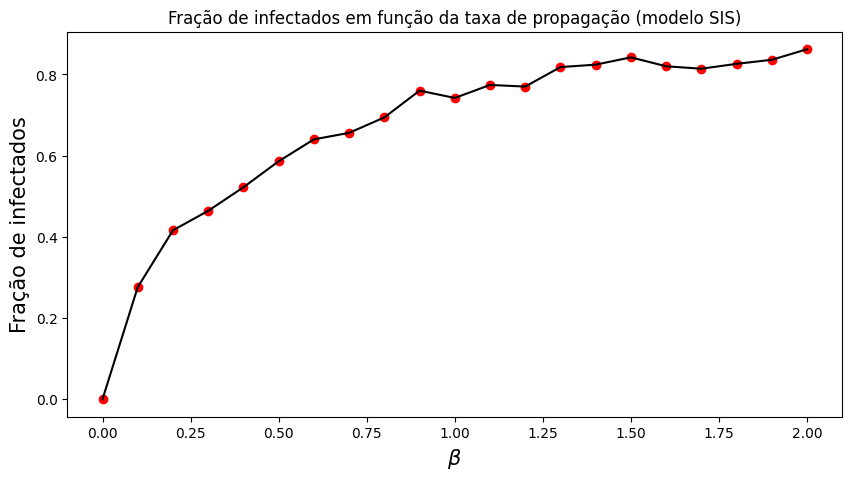

In [11]:
plt.figure(figsize=(10,5))
plt.plot(tau, rho5, 'ro')
plt.plot(tau, rho5, 'k-')
plt.xlabel(r'$\beta$', fontsize = 15)
plt.ylabel('Fração de infectados', fontsize = 15)
plt.title('Fração de infectados em função da taxa de propagação (modelo SIS)')
plt.show()

#### Criando o heatmap da porcentagem de recuperados contra o tempo

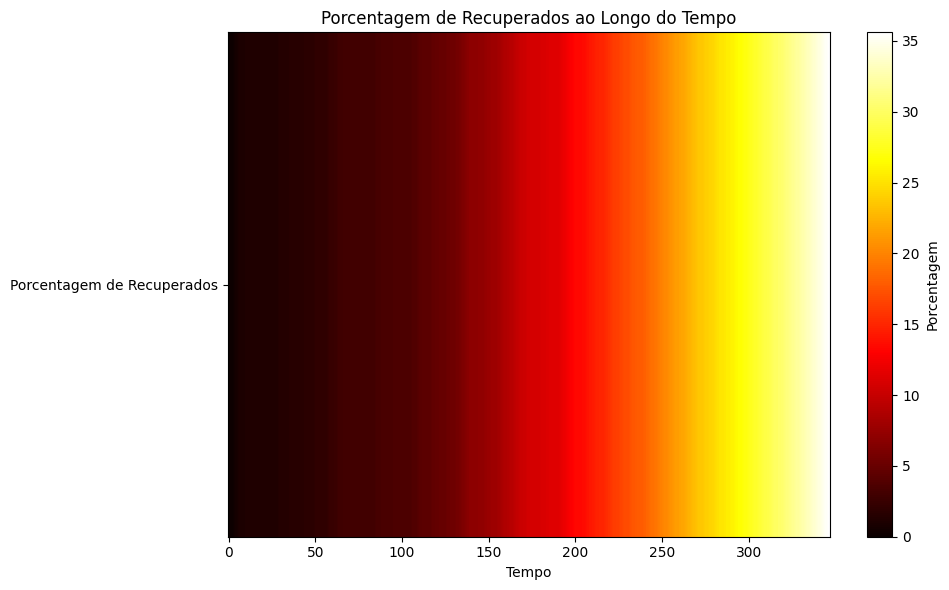

In [12]:
recuperados5 = (R5/N5)*100

fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.imshow([recuperados5], cmap='hot', aspect='auto')

# Configurar o eixo x
ax.set_xticks(np.arange(0, len(t5), 50))
ax.set_xticklabels(np.arange(0, len(t5), 50))
ax.set_xlabel('Tempo')

# Configurar o eixo y
ax.set_yticks([0])
ax.set_yticklabels(['Porcentagem de Recuperados'])

# Adicionar uma barra de cores
cbar = plt.colorbar(heatmap)
cbar.set_label('Porcentagem')

# Mostrar o heatmap
plt.title('Porcentagem de Recuperados ao Longo do Tempo')
plt.tight_layout()
plt.show()

#### Analisando o impacto da vacinação aleatória

Analisamos o impacto da vacinação aleatória considerando que vacinados não serão mais infectados. Consideramos uma taxa de vacinação de $2\%$ e selecionamos nós aleatórios para a vacinação.

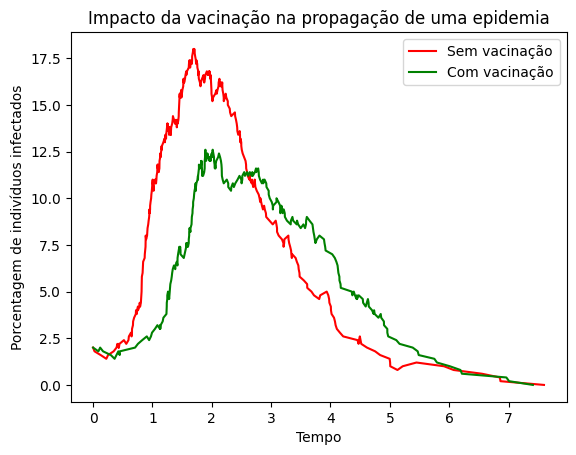

In [13]:
tau = 0.1

# Taxa de vacinação
vaccination_rate = 0.2
num_vaccinated5 = min(int(vaccination_rate * N5), N5)

# Selecionando nós aleatórios para a vacinação
vaccinated_nodes5 = list(np.random.choice(list(G2.nodes()), num_vaccinated5, replace=False))

# Criando uma cópia do grafo sem vacinação
G2_vaccinated = G2.copy()

# Removendo os nós vacinados
G2_vaccinated.remove_nodes_from(vaccinated_nodes5)

# Definindo o estado inicial dos nós
initial_infections5 = list(np.random.choice(list(G2_vaccinated.nodes()), 10, replace=False))

# Simulando a propagação da epidemia sem vacinação
t5, S5, I5, R5 = EoN.fast_SIR(G2, tau, gamma, initial_infecteds=initial_infections5)

# Simulando a propagação da epidemia com vacinação
t5_vac, S5_vac, I5_vac, R5_vac = EoN.fast_SIR(G2_vaccinated, tau, gamma, initial_infecteds=initial_infections5)

# Calculando a porcentagem de infectados pelo tempo
percentage_infected5 = (I5 / N5) * 100
percentage_infected5_vac = (I5_vac / N5) * 100

# Plotando o gráfico dos infectados pelo tempo
plt.plot(t5, percentage_infected5, label='Sem vacinação',color='r')
plt.plot(t5_vac, percentage_infected5_vac, label='Com vacinação',color='green')
plt.xlabel('Tempo')
plt.ylabel('Porcentagem de indivíduos infectados')
plt.title('Impacto da vacinação na propagação de uma epidemia')
plt.legend()
plt.show()

#### Analisando o impacto da vacinação de acordo com Hubs

Para analisar o impacto da vacinação de acordo com os hubs, identificamos os nós com maior grau para vacinação.

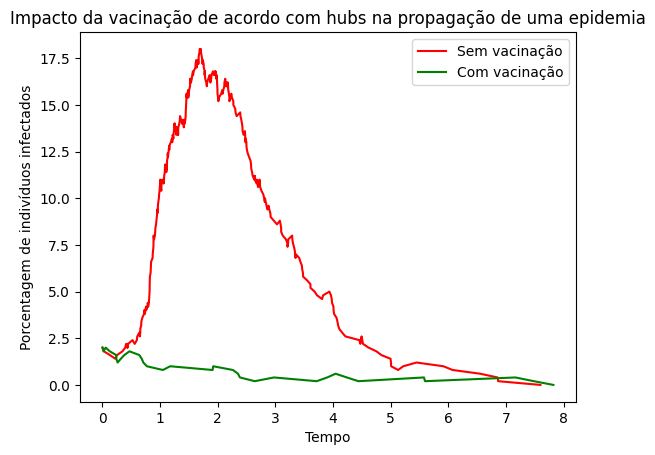

In [14]:
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Identificando os nós com maior grau (hubs)
degrees5 = dict(G2.degree())
hub_nodes5 = [node for node, degree in degrees5.items() if degree >= np.percentile(list(degrees5.values()), 90)]

# Vacinação dos hubs
vaccinated_nodes5 = hub_nodes5
susceptible_nodes5 = list(set(range(N5)) - set(vaccinated_nodes5))

initial_infections5 = list(np.random.choice(susceptible_nodes5, 10, replace=False))

# Simulando a propagação da epidemia
t5_hub, S5_hub, I5_hub, R5_hub = EoN.fast_SIR(G2, tau, gamma, initial_infecteds=initial_infections5, initial_recovereds=vaccinated_nodes5)

# Calculando a porcentagem de infectados pelo tempo
percentage_infected5 = (I5 / N5) * 100
percentage_infected5_hub = (I5_hub / N5) * 100

# Plotando o gráfico dos infectados pelo tempo
plt.plot(t5, percentage_infected5, label='Sem vacinação',color='r')
plt.plot(t5_hub, percentage_infected5_hub, label='Com vacinação',color='green')
plt.xlabel('Tempo')
plt.ylabel('Porcentagem de indivíduos infectados')
plt.title('Impacto da vacinação de acordo com hubs na propagação de uma epidemia')
plt.legend()
plt.show()

#### Analisando o impacto da vacinação de acordo com medidas de centralidade (centralidade do grau)

Para analisar o impacto da vacinação de acordo com a centralidade do grau, primeiro definimos em $2\%$ a fração da população vacinada, em seguida obtemos a centralidade dos nós da rede e selecionamos apenas os nós mais centrais para vacinação.

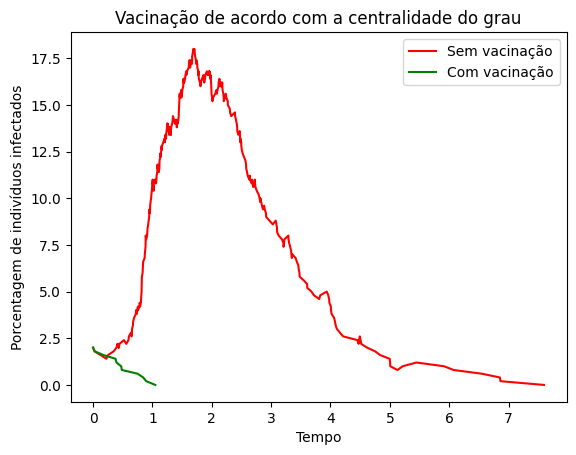

In [15]:
# Defina a fração da população vacinada
vaccinated_fraction = 0.2

# Obtenha a centralidade dos nós na rede
centrality = nx.degree_centrality(G2)

# Ordene os nós por centralidade (do mais central para o menos central)
sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)

# Selecione os nós mais centrais para vacinação
num_nodes_to_vaccinate = int(vaccinated_fraction * N5)
vaccinated_nodes = sorted_nodes[:num_nodes_to_vaccinate]

# Crie um dicionário de estado inicial para a simulação
initial_status = {node: 'S' for node in G2.nodes()}
for node in vaccinated_nodes:
    initial_status[node] = 'V'

susceptible_nodes = list(filter(lambda x: initial_status[x] == 'S',initial_status))
initial_infections = list(np.random.choice(susceptible_nodes, 10, replace=False))

# Definindo os parâmetros da epidemia
tau = 0.1  # Taxa de transmissão
gamma = 1  # Taxa de recuperação

# Realize a simulação da epidemia usando a biblioteca EoN
t5_vac, S5_vac, I5_vac, R5_vac = EoN.fast_SIR(G2, tau, gamma, initial_infecteds=initial_infections, initial_recovereds=vaccinated_nodes)

# Calculando a porcentagem de infectados pelo tempo
percentage_infected5 = (I5 / N5) * 100
percentage_infected5_vac = (I5_vac / N5) * 100

# Plotando o gráfico dos infectados pelo tempo
plt.plot(t5, percentage_infected5, label='Sem vacinação',color='r')
plt.plot(t5_vac, percentage_infected5_vac, label='Com vacinação',color='green')
plt.xlabel('Tempo')
plt.ylabel('Porcentagem de indivíduos infectados')
plt.title('Vacinação de acordo com a centralidade do grau')
plt.legend()
plt.show()

Com os três gráficos acima, podemos concluir que a vacinação aleatória é muito menos eficaz que as vacinações de acordo com Hubs e de acordo com medida de centralidade. Esta conclusão é esperada, pois os dois últimos tipos de vacinação focam em vacinar aglomerados, que são centros de infecção.

## **4) Conclusão**

Neste projeto, utilizamos modelos de propagação de epidemias em redes complexas, empregando a biblioteca EoN do Python. Analisamos os modelos SIR e SIS em diferentes topologias de rede, como Erdos-Renyi, bem como redes de aeroportos. Também exploramos diferentes estratégias de vacinação, incluindo vacinação aleatória, vacinação de acordo com hubs e vacinação de acordo com a centralidade do grau.

Ao longo do projeto, obtivemos insights valiosos sobre a propagação de epidemias em diferentes tipos de redes. Observamos que a estrutura da rede desempenha um papel significativo na disseminação da doença, influenciando a velocidade e a extensão da propagação. Redes com uma proporção maior de conexões aleatórias, como Erdos-Renyi, tendem a ter uma disseminação mais rápida em comparação com redes que possuem hubs ou estrutura de comunidades mais definida.

No modelo SIS, analisamos as mudanças na fração de infectados ao longo do tempo e em função da taxa de propagação. Observamos que a taxa de propagação tem um impacto direto na quantidade de indivíduos infectados e como ela se espalha pela rede. Quanto maior a taxa de propagação, maior a fração de indivíduos infectados.

No modelo SIR, investigamos a porcentagem de recuperados em função da taxa de propagação, além de observar a evolução dos suscetíveis, infectados e recuperados ao longo do tempo. Também geramos um heatmap que mostrou a porcentagem de recuperados em relação ao tempo, fornecendo uma visualização clara do progresso da epidemia. Ao analisar diferentes estratégias de vacinação, constatamos que a escolha dos indivíduos vacinados desempenha um papel crucial na contenção da epidemia. Vacinar aleatoriamente, de acordo com hubs ou de acordo com a centralidade do grau pode ter efeitos diferentes na propagação da doença.

Após analisar os resultados obtidos em diferentes redes complexas, concluímos que a vacinação desempenhou um papel significativo na redução do impacto da epidemia na população. Em todas as topologias de rede investigadas, a vacinação foi capaz de diminuir o tempo de duração da epidemia.

No entanto, observamos que as estratégias de vacinação adotadas tiveram impactos distintos em cada tipo de rede. Em geral, a vacinação de acordo com hubs e de acordo com medidas de centralidade apresentaram resultados mais eficazes do que a vacinação aleatória. Isso ocorre porque, ao direcionar a vacinação para os nós mais conectados ou aqueles com maior centralidade do grau, conseguimos imunizar indivíduos que têm maior probabilidade de se tornarem infectados e disseminarem a doença.

Esses resultados destacam a importância de considerar a estrutura específica de cada rede ao planejar estratégias de vacinação. Adaptar a vacinação às características da rede pode maximizar o impacto positivo na contenção da epidemia. Por exemplo, em redes com uma estrutura mais centralizada, a vacinação de acordo com hubs pode ser mais eficaz, enquanto em redes com uma estrutura mais distribuída, a vacinação de acordo com a centralidade do grau pode ser mais adequada.

Em suma, os resultados reforçam a importância de uma abordagem personalizada na vacinação, levando em consideração a topologia da rede. Essa compreensão mais aprofundada sobre como a estrutura da rede e diferentes estratégias de vacinação afetam a propagação da epidemia contribui para aprimorar a eficácia das medidas de controle e prevenção, auxiliando na mitigação de futuras epidemias e protegendo a saúde pública.

## **Referências**

Documentação da biblioteca EoN (Epidemics on Networks), disponível em:

https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html